# Tutoriel Pytorch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# import pytorch library
import torch

In [2]:
print(os.listdir("./"))

['.vscode', 'chest_xray', 'global-wheat-detection', 'global-wheat-detection.zip', 'graph.png', 'NLP.code-workspace', 'Pytorch_tutorial.ipynb', 'sample_submission.csv', 'test.csv', 'train.csv']


### La base

In [3]:
# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x0000016679F5BD10>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Méthodes pour passer de numpy à des tensors de torch : 
* torch.Tensor(array) : passe d'un array à un tensor
* torch.from_numpy(array) : passe d'un numpy array à tensor
* tensor.numpy() : convertit tensor en numpy array

Comme pour numpy, on peut faire différentes opérations au tensor

In [5]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


Quelque chose en plus chez les tensors de pytorch est le fait qu'on peut obtenir leurs différentielles, leurs dérivés partielles,.... Pour les NN et les différentes méthodes de descente de gradient

ATTENTION : La différence entre les objets Variable de torch et les tensors de torch sont, que les Variables accumulent le gradient 

Un petit point sur la manière que pytorch effectue le calcul du gradient ou les dérivés de manière générale : [Lien](https://stackoverflow.com/questions/62067400/understanding-accumulated-gradients-in-pytorch)

" How to calculate partial derivatives 

Every intermediate tensor automatically requires gradients and has a grad_fn, which is the function to calculate the partial derivatives with respect to its inputs. Thanks to the chain rule, we can traverse the whole graph in reverse order to calculate the derivatives with respect to every single leaf, which are the parameters we want to optimise. That's the idea of backpropagation, also known as reverse mode differentiation. "

"Gradient Accumulation

Gradient accumulation refers to the situation, where multiple backwards passes are performed before updating the parameters. The goal is to have the same model parameters for multiple inputs (batches) and then update the model's parameters based on all these batches, instead of performing an update after every single batch."



In [6]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [7]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


### Exemple de régression linéaire

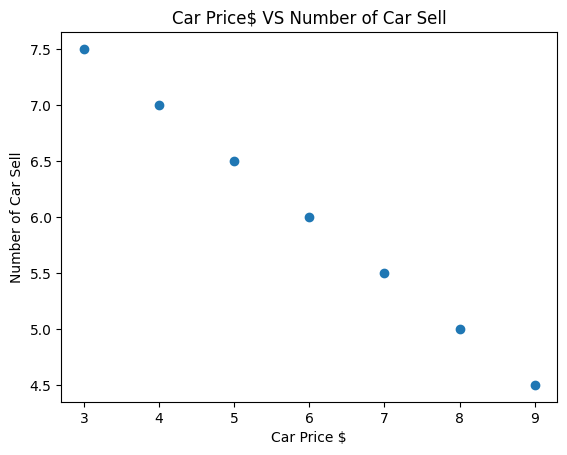

In [8]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [9]:
import torch.nn as nn 
import warnings

warnings.filterwarnings("ignore")

#Création de la classe
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()

        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self,x):
        return self.linear(x)


input_dim,output_dim=1,1

model = LinearRegression(input_dim,output_dim)

In [10]:
#La fonction de perte
mse = nn.MSELoss()

In [11]:
#La méthode d'optimisation
lr=0.02
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

epoch 0, loss 29.858739852905273
epoch 50, loss 4.269852161407471
epoch 100, loss 2.88531756401062
epoch 150, loss 1.9497308731079102
epoch 200, loss 1.3175147771835327
epoch 250, loss 0.8903002142906189
epoch 300, loss 0.6016138195991516
epoch 350, loss 0.4065351188182831
epoch 400, loss 0.2747128903865814
epoch 450, loss 0.18563500046730042
epoch 500, loss 0.1254415661096573
epoch 550, loss 0.08476661145687103
epoch 600, loss 0.057280559092760086
epoch 650, loss 0.0387066975235939
epoch 700, loss 0.026155410334467888
epoch 750, loss 0.017674492672085762
epoch 800, loss 0.011943410150706768
epoch 850, loss 0.008070721291005611
epoch 900, loss 0.0054537407122552395
epoch 950, loss 0.0036853253841400146
epoch 1000, loss 0.002490390557795763


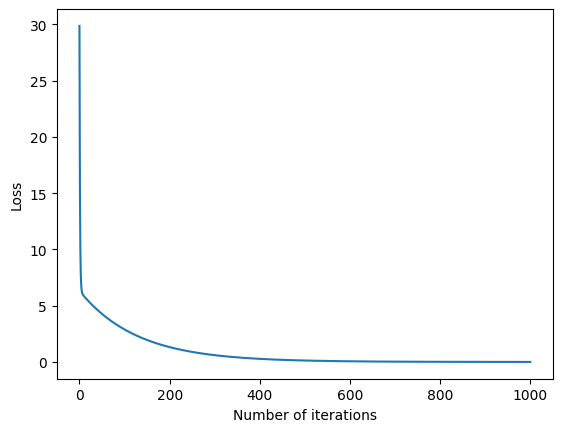

In [12]:
# La fonction de train 

def train(iteration_number=1001):
    loss_list=[]
    for iteration in range(iteration_number):

        # optimisation
        optimizer.zero_grad()

        # forward
        outputs=model.forward(car_price_tensor)

        # Calcul du mse
        loss = mse(outputs,number_of_car_sell_tensor)

        # Backward propagation
        loss.backward()

        # Maj des params
        optimizer.step()

        # Garde la coût 
        loss_list.append(loss.data)

        # print loss
        if(iteration % 50 == 0):
            print('epoch {}, loss {}'.format(iteration, loss.data))

    plt.plot(range(iteration_number),loss_list)
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.show()

train()

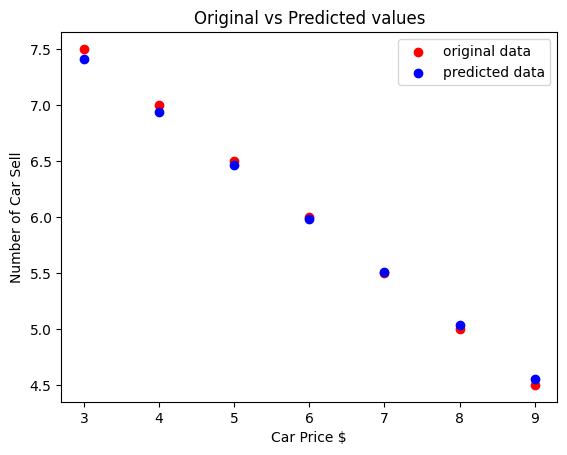

In [13]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

### Exemple de régression logistique

In [14]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split


In [15]:
## On importe les données de MNIST

#training_data = datasets.FashionMNIST(
#    root="data",
#    train=True,
#    download=True,
#    transform=ToTensor()
#)
#
#test_data = datasets.FashionMNIST(
#    root="data",
#    train=False,
#    download=True,
#    transform=ToTensor()
#)

In [16]:
train = pd.read_csv("./train.csv", dtype=np.float32)
test = pd.read_csv("./test.csv",dtype=np.float32)

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

X_train,X_test,y_train,y_test = train_test_split(features_numpy,targets_numpy,test_size=0.2,random_state=4)


In [18]:
features_train=X_train
targets_train=y_train

features_test=X_test
targets_test=y_test

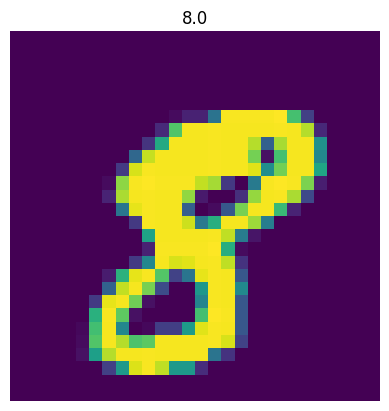

In [19]:
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [20]:
# TensorDataset juste rassemble tout données et labels ensemble pour être accéder plus facilement : TensorDataset().tensor permet de les récupérer, donne X,y
train.tensors[0],train.tensors[1]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([5, 0, 3,  ..., 2, 9, 2]))

In [21]:
# Création d'un régression logistique

class LogisticRegression(nn.Module):
    def __init__(self, input_dim,output_dim) -> None:
        super(LogisticRegression,self).__init__()

        self.logistic = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.logistic(x)

input_dim=28*28
output_dim=10

model=LogisticRegression(input_dim,output_dim)

crossentropy_loss = nn.CrossEntropyLoss()

lr=0.02
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [22]:
from tqdm import tqdm
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


def train_logistic():
    # Traning the Model
    count = 0
    loss_list = []
    iteration_list = []
    for epoch in tqdm(range(num_epochs)):
        for i, (images, labels) in enumerate(train_loader):
            
            # Define variables
            train = Variable(images.view(-1, 28*28))
            labels = Variable(labels)

            # Optimisation
            optimizer.zero_grad()

            # Forward
            outputs=model.forward(train)

            # Loss
            loss = crossentropy_loss(outputs,labels)

            # Backward
            loss.backward()

            # Maj des params
            optimizer.step()

            count += 1
            # Prediction 
            if count%50==0:
                # Calcul accuracy
                correct=0
                total=0

                #Predict test dataset
                for images,labels in test_loader:
                    
                    test = Variable(images.view(-1,28*28))
                    labels = Variable(labels)

                    outputs_test = model.forward(test)

                    # Donne les indices des maximum trouvé
                    prediction = torch.max(outputs_test.data,1)[1]

                    total += len(labels)

                    # Total correct predictions

                    correct += (prediction == labels).sum()
                
                accuracy=100 * (correct/float(total))
                
                loss_list.append(loss.data)
                
                iteration_list.append(count)
            
            if count %500 ==0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))
            
    return loss_list,iteration_list

In [23]:
loss_list,iteration_list=train_logistic()

  3%|▎         | 1/29 [00:02<01:02,  2.22s/it]

Iteration: 500  Loss: 0.6511524319648743  Accuracy: 85.67857360839844%


 10%|█         | 3/29 [00:06<00:52,  2.02s/it]

Iteration: 1000  Loss: 0.4398881494998932  Accuracy: 87.22618865966797%


 14%|█▍        | 4/29 [00:07<00:48,  1.94s/it]

Iteration: 1500  Loss: 0.4927860498428345  Accuracy: 88.35714721679688%


 21%|██        | 6/29 [00:11<00:45,  1.98s/it]

Iteration: 2000  Loss: 0.33332985639572144  Accuracy: 88.78571319580078%


 24%|██▍       | 7/29 [00:14<00:44,  2.02s/it]

Iteration: 2500  Loss: 0.40092942118644714  Accuracy: 89.05952453613281%


 31%|███       | 9/29 [00:17<00:38,  1.93s/it]

Iteration: 3000  Loss: 0.30906057357788086  Accuracy: 89.42857360839844%


 34%|███▍      | 10/29 [00:19<00:37,  1.96s/it]

Iteration: 3500  Loss: 0.3953920304775238  Accuracy: 89.67857360839844%


 41%|████▏     | 12/29 [00:24<00:35,  2.09s/it]

Iteration: 4000  Loss: 0.26985853910446167  Accuracy: 89.77381134033203%


 45%|████▍     | 13/29 [00:26<00:32,  2.02s/it]

Iteration: 4500  Loss: 0.2286389321088791  Accuracy: 89.9047622680664%


 52%|█████▏    | 15/29 [00:29<00:26,  1.91s/it]

Iteration: 5000  Loss: 0.3005374073982239  Accuracy: 90.03571319580078%


 55%|█████▌    | 16/29 [00:31<00:25,  1.96s/it]

Iteration: 5500  Loss: 0.36900848150253296  Accuracy: 90.16666412353516%


 62%|██████▏   | 18/29 [00:35<00:21,  1.94s/it]

Iteration: 6000  Loss: 0.253424733877182  Accuracy: 90.11904907226562%


 66%|██████▌   | 19/29 [00:37<00:19,  1.91s/it]

Iteration: 6500  Loss: 0.2583830654621124  Accuracy: 90.32142639160156%


 69%|██████▉   | 20/29 [00:39<00:17,  1.90s/it]

Iteration: 7000  Loss: 0.3104524314403534  Accuracy: 90.35713958740234%


 76%|███████▌  | 22/29 [00:43<00:13,  1.97s/it]

Iteration: 7500  Loss: 0.3304080069065094  Accuracy: 90.53571319580078%


 79%|███████▉  | 23/29 [00:45<00:11,  1.94s/it]

Iteration: 8000  Loss: 0.31689345836639404  Accuracy: 90.52381134033203%


 86%|████████▌ | 25/29 [00:49<00:07,  1.87s/it]

Iteration: 8500  Loss: 0.2916640341281891  Accuracy: 90.71428680419922%


 90%|████████▉ | 26/29 [00:50<00:05,  1.88s/it]

Iteration: 9000  Loss: 0.17514243721961975  Accuracy: 90.71428680419922%


 97%|█████████▋| 28/29 [00:54<00:01,  1.94s/it]

Iteration: 9500  Loss: 0.36382386088371277  Accuracy: 90.86904907226562%


100%|██████████| 29/29 [00:56<00:00,  1.95s/it]


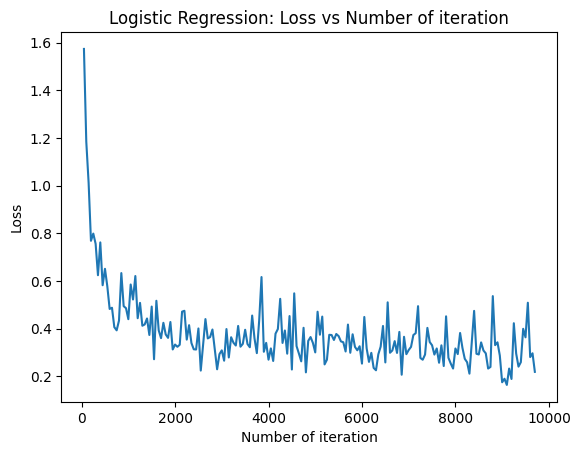

In [24]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [25]:
class ANN(nn.Module):
    def __init__(self,input_dim,output_dim,hidden_layer_dim) -> None:
        super(ANN,self).__init__()

        self.MLP = nn.Sequential(
                    nn.Linear(input_dim,hidden_layer_dim),
                    nn.ReLU(),
                    nn.Linear(hidden_layer_dim,hidden_layer_dim),
                    nn.Tanh(),
                    nn.Linear(hidden_layer_dim,hidden_layer_dim),
                    nn.ELU(),
                    nn.Linear(hidden_layer_dim,hidden_layer_dim),
                    nn.ReLU(),
                    nn.Linear(hidden_layer_dim,output_dim)
                    )

    def forward(self,x):
        return self.MLP(x)

mlp = ANN(28*28,10,150)

In [26]:
crossentropy_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(),lr=0.01)

In [27]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

def train_mlp(mlp=mlp):
    loss_list=[]
    iter_list=[]
    accuracy_list=[]
    count=0
    for epoch in range(29):
        for i, (images,labels) in enumerate(train_loader):

            train = Variable(images.view(-1,28*28))
            labels = Variable(labels)

            # Optimisation
            optimizer.zero_grad()

            # Forward
            out = mlp(train)

            # Loss
            loss = crossentropy_loss(out,labels)

            # backward
            loss.backward()

            # Maj des params
            optimizer.step()

            count+=1

            if count%336==0:
                correct=0
                total=0
                
                for images,labels in test_loader:

                    test = Variable(images.view(-1,28*28))
                
                    prediction_test = mlp(test)

                    prediction_test = torch.max(prediction_test.data,1)[1]

                    correct+=(prediction_test==labels).sum()
                    total +=len(labels)

                accuracy = 100 * (correct/float(total))

                loss_list.append(loss.data)
                iter_list.append(count)
                accuracy_list.append(accuracy)
                print(f"Model epoch n°{epoch} : Accuracy = {accuracy}, Loss = {loss.data}")
        
    return loss_list,accuracy_list,iter_list

In [28]:
loss_list,accuracy_list,iter_list=train_mlp()

Model epoch n°0 : Accuracy = 20.2261905670166, Loss = 2.2835707664489746
Model epoch n°1 : Accuracy = 43.5, Loss = 2.220822334289551
Model epoch n°2 : Accuracy = 41.03571319580078, Loss = 1.8592599630355835
Model epoch n°3 : Accuracy = 66.83333587646484, Loss = 1.1816048622131348
Model epoch n°4 : Accuracy = 76.2261962890625, Loss = 0.9430174827575684
Model epoch n°5 : Accuracy = 79.8452377319336, Loss = 0.8563891053199768
Model epoch n°6 : Accuracy = 82.52381134033203, Loss = 0.8009326457977295
Model epoch n°7 : Accuracy = 84.78571319580078, Loss = 0.7530850172042847
Model epoch n°8 : Accuracy = 86.80952453613281, Loss = 0.7041680216789246
Model epoch n°9 : Accuracy = 88.02381134033203, Loss = 0.6628077626228333
Model epoch n°10 : Accuracy = 88.88095092773438, Loss = 0.6312647461891174
Model epoch n°11 : Accuracy = 89.63095092773438, Loss = 0.6079313158988953
Model epoch n°12 : Accuracy = 90.26190948486328, Loss = 0.5877259373664856
Model epoch n°13 : Accuracy = 90.98809051513672, Los

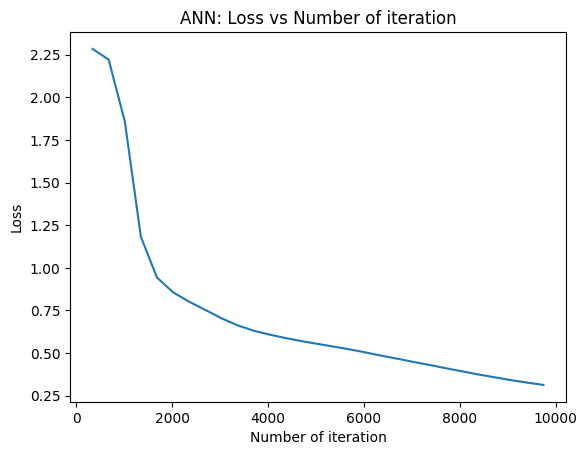

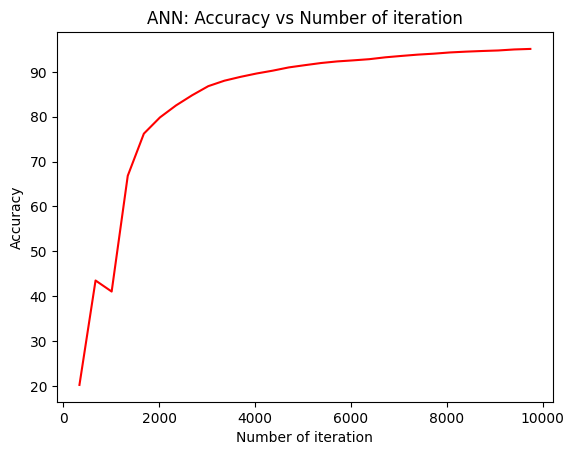

In [29]:
# visualization loss 
plt.plot(iter_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iter_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

### CNN

In [30]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.features_learning = nn.Sequential(
            # 28x28x1 -> 12x12x16
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            
            # 12x12x16 -> 4x4x32
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.flatten = nn.Flatten()

        self.linear = nn.Sequential(
            nn.Linear(in_features=4*4*32,out_features=256),
            nn.Dropout(0.2),
            nn.Linear(256,10)
        )
    
    def forward(self,x):
        out=self.features_learning(x)
        out=self.flatten(out)
        out=self.linear(out)
        return out
model_cnn=CNNModel()

In [31]:
crossentropy_loss=nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cnn.parameters(),lr=0.01)

In [32]:
targetsTrain

tensor([5, 0, 3,  ..., 2, 9, 2])

In [33]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

def train_cnn(model=model_cnn):
    loss_list=[]
    iter_list=[]
    accuracy_list=[]
    count=0
    for epoch in range(29):
        for i, (images,labels) in enumerate(train_loader):

            train = Variable(images.view(100,1,28,28)) # reshape des batchs
            labels = Variable(labels)

            # Optimisation
            optimizer.zero_grad()

            # Forward
            out = model(train)

            # Loss
            loss = crossentropy_loss(out,labels)

            # backward
            loss.backward()

            # Maj des params
            optimizer.step()

            count+=1

            if count%336==0:
                correct=0
                total=0
                
                for images,labels in test_loader:

                    test = Variable(images.view(100,1,28,28))
                
                    prediction_test = model(test)

                    prediction_test = torch.max(prediction_test.data,1)[1]

                    correct+=(prediction_test==labels).sum()
                    total +=len(labels)

                accuracy = 100 * (correct/float(total))

                loss_list.append(loss.data)
                iter_list.append(count)
                accuracy_list.append(accuracy)
                print(f"Model epoch n°{epoch} : Accuracy = {accuracy}, Loss = {loss.data}")
        
    return loss_list,accuracy_list,iter_list



In [35]:
loss_list,accuracy_list,iter_list=train_cnn()

Model epoch n°0 : Accuracy = 97.35713958740234, Loss = 0.14462774991989136
Model epoch n°1 : Accuracy = 97.44047546386719, Loss = 0.15340101718902588
Model epoch n°2 : Accuracy = 97.48809051513672, Loss = 0.15039578080177307
Model epoch n°3 : Accuracy = 97.51190185546875, Loss = 0.14187771081924438
Model epoch n°4 : Accuracy = 97.51190185546875, Loss = 0.13670854270458221
Model epoch n°5 : Accuracy = 97.44047546386719, Loss = 0.13257010281085968
Model epoch n°6 : Accuracy = 97.6190414428711, Loss = 0.12739776074886322
Model epoch n°7 : Accuracy = 97.69047546386719, Loss = 0.14276614785194397
Model epoch n°8 : Accuracy = 97.69047546386719, Loss = 0.12622575461864471
Model epoch n°9 : Accuracy = 97.67857360839844, Loss = 0.14112448692321777
Model epoch n°10 : Accuracy = 97.6547622680664, Loss = 0.1364501416683197
Model epoch n°11 : Accuracy = 97.66667175292969, Loss = 0.11806496977806091
Model epoch n°12 : Accuracy = 97.69047546386719, Loss = 0.10885534435510635
Model epoch n°13 : Accura

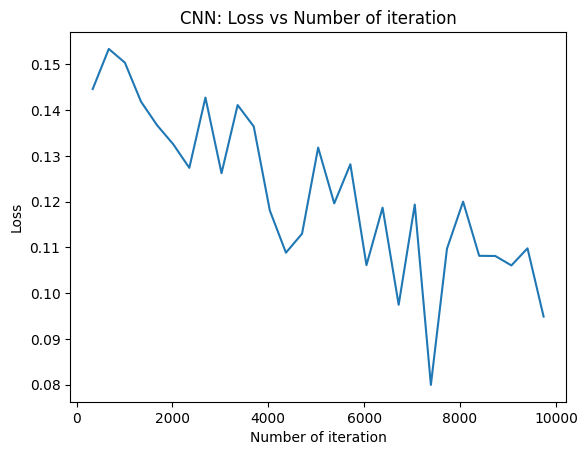

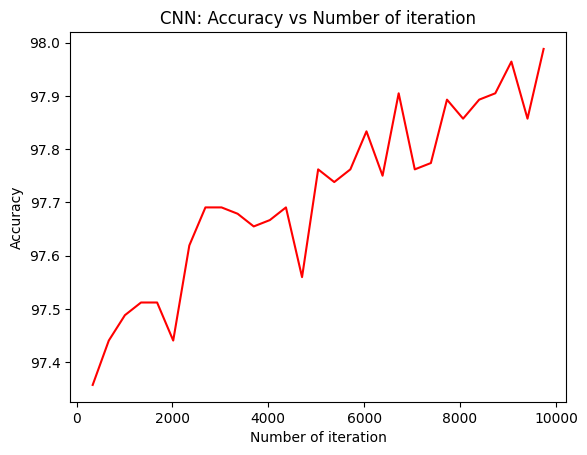

In [36]:
# visualization loss 
plt.plot(iter_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iter_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [37]:
print(model_cnn)

CNNModel(
  (features_learning): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)


### CNN chest xray

In [38]:
import os
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

EPOCHS = 2
BATCH_SIZE = 100
LEARNING_RATE = 0.01
TRAIN_DATA_PATH = "./chest_xray/chest_xray/train/"
TEST_DATA_PATH = "./chest_xray/chest_xray/test/"
VALID_DATA_PATH = "./chest_xray/chest_xray/val/"

MinMax = lambda img : (img - img.min()) / (img.max() - img.min())

# Pour faire des opérations sur les images
TRANSFORM_IMG = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256,256)),
    transforms.Normalize(mean=[127.5,127.5,127.5],std=[127.5,127.5,127.5])
    ])

# ImageFolder a generic dataloader for images
train_data = ImageFolder(root=TRAIN_DATA_PATH,transform=TRANSFORM_IMG)
test_data = ImageFolder(root=TEST_DATA_PATH,transform=TRANSFORM_IMG)
valid_data = ImageFolder(root=VALID_DATA_PATH,transform=TRANSFORM_IMG)

# DataLoader : combine un échantilleur et les jeux de données
train_loader =  DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_loader =  DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)
valid_loader =  DataLoader(valid_data,batch_size=BATCH_SIZE,shuffle=True)

In [39]:
for images, labels in train_loader:
    print(images.shape)
    print(Variable(labels))
    break

torch.Size([100, 3, 256, 256])
tensor([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0])


In [40]:
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [42]:
class CNN_XRAY(nn.Module):
    
    def __init__(self) -> None:
        super(CNN_XRAY,self).__init__()
        
        # input shape 256x256x3
        self.features_learning = nn.Sequential(
            
            # 256x256x3 -> 128x128x32
            nn.Conv2d(3,32,kernel_size=5,padding=2,stride=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            
            # 64x64x32 -> 16x16x64
            nn.Conv2d(32,64,kernel_size=5,padding=2,stride=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            # 16x16x64 -> 4x4x64
            nn.Conv2d(64,64,kernel_size=5,padding=2,stride=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.flatten = nn.Flatten()

        self.linear = nn.Sequential(
            nn.Linear(4*4*64,1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,2),
        )
    
    def forward(self,x):
        out = self.features_learning(x)
        out= self.flatten(out)
        return self.linear(out)

model_xray = CNN_XRAY().to(device)
crossentropy_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_xray.parameters(),lr=0.001)

print(model_xray)

CNN_XRAY(
  (features_learning): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=2, bias=True)
  )
)


In [44]:
for images,labels in train_loader:

    train = Variable(images,requires_grad=True).to(device)
    labels = Variable(labels).to(device)
    # optimisation
    optimizer.zero_grad()

    # forward
    out = model_xray(train)
    predicted = torch.max(out,1)[1]
    
    loss = crossentropy_loss(out,labels)
    print(loss)
    #print(type(predicted),type(labels),labels.shape,predicted.shape)
    break

tensor(0.6877, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [45]:
def train_model(epochs, model, optimizer, device_name):
    
    train_losses = []
    validation_losses = []
    train_accuracies = []
    validation_accuracies = []
    
    for epoch in tqdm(range(epochs)):
        model.train() #Partie entrainement 
        optimizer.zero_grad()
        
        train_batch_losses = []
        validation_batch_losses = []
        train_batch_accuracies = []
        validation_batch_accuracies = []
        for train_batch in train_loader:
            optimizer.zero_grad()
            
            images, labels = train_batch 
            images=images.to(device_name)  ##parallélisation, a retenir comment on a changé le bit dans es registres pour matériel 
            labels=labels.to(device_name)
            out = model(images)
            loss_train = crossentropy_loss(out, labels)
            
            train_batch_losses.append(loss_train.detach())  
            train_batch_accuracies.append(accuracy(out, labels))
        
            loss_train.backward()  #apprend en faisant backward
            optimizer.step()
            
        with torch.no_grad(): #Partie qui évalue au fur et à mesure le modèle entrainé 
            model.eval()
            for val_batch in valid_loader:
                images, labels = val_batch 
                images=images.to(device_name)
                labels=labels.to(device_name)
                out = model(images)
                loss_validation = crossentropy_loss(out, labels)
                validation_batch_losses.append(loss_validation.detach())
                validation_batch_accuracies.append(accuracy(out, labels))

        
        train_losses.append(torch.stack(train_batch_losses).mean().item()) 
        validation_losses.append(torch.stack(validation_batch_losses).mean().item())
        train_accuracies.append(torch.stack(train_batch_accuracies).mean().item())
        validation_accuracies.append(torch.stack(validation_batch_accuracies).mean().item())
        
        
        print("Epoch:", epoch+1, "Train_loss:", round(train_losses[-1], 4), "Validation_loss:", round(validation_losses[-1], 4), "Validation_accuracy:", round(validation_accuracies[-1], 4))
    
    return train_losses, validation_losses, train_accuracies, validation_accuracies

In [46]:
train_losses, validation_losses, train_accuracies, validation_accuracies = train_model(epochs=5,model=model_xray,optimizer=optimizer,device_name=device)

 10%|█         | 1/10 [02:49<25:25, 169.49s/it]

N°0 :  Loss_train = 0.6765013337135315, Loss_valid = 0.6940425038337708


 20%|██        | 2/10 [05:18<20:57, 157.22s/it]

N°1 :  Loss_train = 0.6636585593223572, Loss_valid = 0.6959112286567688


 20%|██        | 2/10 [05:23<21:35, 161.98s/it]


KeyboardInterrupt: 

In [ ]:
def test():
    correct_test = 0
    total_test = 0
    #train
    model_xray.train(False)
    for images,labels in tqdm(test_loader):

        test = Variable(images,requires_grad=True).to(device)
        labels = Variable(labels).to(torch.float32).to(device)
        # optimisation
        optimizer.zero_grad()

        # forward
        out = model_xray(test)

        predicted = torch.max(out,1)[1].to(torch.float32)
    
    return predicted,labels

In [ ]:
predict_test,labels_test=test()

100%|██████████| 7/7 [00:24<00:00,  3.51s/it]


In [ ]:
predict_test,labels_test

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        device='cuda:0'),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1.], device='cuda:0'))